In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [29]:
def inverseGammaDistUnnormalized(x, d_mean, k=3.1):
    if (x==0):
        return 0
    else:
        z = x/d_mean
        return (z**(-k))*np.exp(-(k-2)/z)

N = 5
mean_dists = np.linspace(1000, 5000, N)
d_drt = np.zeros(N)
beta = 1/6*(np.sqrt(2)+np.log(1+np.sqrt(2)))

for i,mean_dist in enumerate(mean_dists):
    invGammaDistUnnormMean = lambda x: inverseGammaDistUnnormalized(x, mean_dist)
    normalization_inverse_gamma = scipy.integrate.quad(invGammaDistUnnormMean,0,np.infty)[0]

    print("Normalization factor for InverseGamma distribution: ", normalization_inverse_gamma)

    def inverseGammaDist_(x):
        return invGammaDistUnnormMean(x)/normalization_inverse_gamma

    rpr_ = lambda x: x*inverseGammaDist_(x)

    def getBimFrac_(dcut):
        return scipy.integrate.quad(inverseGammaDist, dcut, np.infty)[0]

    def getBimFracAvDist_(ell, dcut):
        return getBimFrac_(dcut)*2*beta*ell

    def getUniFrac_(dcut):
        return 1 - getBim_Frac_(dcut)

    def getUniFracAvDist_(dcut):
        return scipy.integrate.quad(rpr_, 0, dcut)[0]

    rpr = np.vectorize(rpr_)
    inverseGammaDist = np.vectorize(inverseGammaDist_)
    getBimFrac = np.vectorize(getBimFrac_)
    getUniFrac = np.vectorize(getUniFrac_)
    getBimFracAvDist = np.vectorize(getBimFracAvDist_)
    getUniFracAvDist = np.vectorize(getUniFracAvDist_)
    average_dist_theory = scipy.integrate.quad(rpr_,0,np.infty)[0]
    
    ell = mean_dist
    dcut = 2*beta*ell
    d_drt[i] = (getBimFracAvDist(ell,dcut)+getUniFracAvDist(dcut))/average_dist_theory
#     d_drt[i] = getBimFracAvDist(ell,dcut)/average_dist_theory
#     d_drt[i] = getUniFracAvDist(dcut)/average_dist_theory

Normalization factor for InverseGamma distribution:  856.6604564695375
Normalization factor for InverseGamma distribution:  1713.3209129390743
Normalization factor for InverseGamma distribution:  2569.981369408624
Normalization factor for InverseGamma distribution:  3426.6418258781496
Normalization factor for InverseGamma distribution:  4283.302282347652


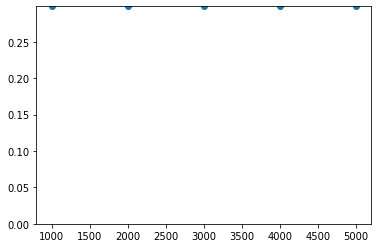

In [30]:
plt.scatter(mean_dists, d_drt)

plt.ylim(0,None)
plt.show()